# Manikanta Reddy Nayini
## Project 3
### In this project  scikit-learn is used, which is a higher-level machine learning library that workswith NumPy, to compare the performance of linear and polynomial regression models.


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#### 1. Use the NumPy load() method to read the dataset. The data contains two arrays:'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.


In [107]:
data = np.load('boston.npz')

In [108]:
x = data['features']
y = data['target']
mse_dict = {}

In [109]:
print(x[0])

[8.8730e-02 2.1000e+01 5.6400e+00 0.0000e+00 4.3900e-01 5.9630e+00
 4.5700e+01 6.8147e+00 4.0000e+00 2.4300e+02 1.6800e+01 3.9556e+02
 1.3450e+01]


#### 2. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set,and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-11).

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=(2021-3-11))

In [111]:
print(x_train)

[[9.76170e-01 0.00000e+00 2.18900e+01 ... 2.12000e+01 2.62760e+02
  1.73100e+01]
 [9.32909e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  1.81300e+01]
 [2.98190e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.77510e+02
  3.92000e+00]
 ...
 [7.05042e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.52000e+00
  2.32900e+01]
 [4.81900e-02 8.00000e+01 3.64000e+00 ... 1.64000e+01 3.92890e+02
  6.57000e+00]
 [1.32620e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 3.94050e+02
  1.64700e+01]]


In [112]:
print(len(x_train), len(x_test), len(y_train))
print(x_train.shape)

404 102 404
(404, 13)


#### 3. Create a scatterplot of the training data showing the relationship between thepercentage of the population that is lower status and the median value of a home. Does the relationship appear to be linear?

In [113]:
print(type(x_train))

<class 'numpy.ndarray'>


In [114]:
x_lstat = x_train[:,12]
y_medv = y_train

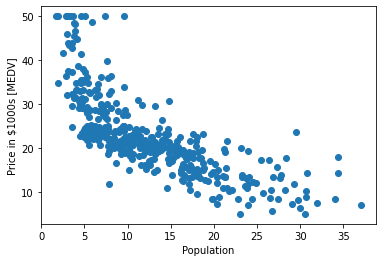

In [115]:
plt.scatter(x_lstat,y_medv)
plt.xlabel('Population')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

#### 4. With LSTAT as X and MEDV as y, create and fit() an sklearn.linear_model.LinearRegression model. Using the coef_ and intercept_attributes of the model, what is the equation for MEDV as a linear function of LSTAT?


In [116]:
print(x_lstat.shape, y_medv.shape)

(404,) (404,)


In [117]:
X = x_lstat
t = y_medv
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
print(X.shape)
print(t.shape)


(404, 1)
(404, 1)


In [118]:
reg = LinearRegression().fit(X, t)

In [119]:
reg.score(X, t)

0.560924718711806

In [120]:
reg.coef_

array([[-0.98093888]])

In [121]:
reg.intercept_

array([34.99113302])

In [122]:
 print('The line equation is: y = ',reg.coef_[0][0],'*x + ',reg.intercept_[0])

The line equation is: y =  -0.980938881185576 *x +  34.991133021969475


#### 5. Use the coef_ and intercept_ attributes of the model to add a line representing the least squares fit to your scatter plot from experiment (3). How well does the model appear to fit the training data?


No handles with labels found to put in legend.


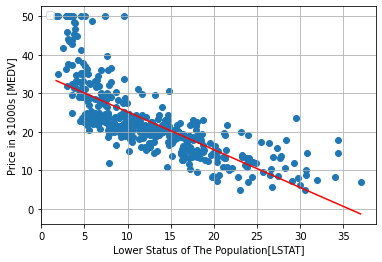

In [123]:
x = np.linspace(min(x_lstat),max(x_lstat),404)
y = reg.coef_[0]*x + reg.intercept_
plt.plot(x, y, '-r')
plt.legend(loc='upper left')
plt.scatter(x_lstat, y_medv)
plt.xlabel('Lower Status of The Population[LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.grid()
plt.show()

> The model appears to fit well for the training data.

#### 6. Use the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.


In [124]:
print(X.shape)
y_pred = reg.predict(X)

(404, 1)


In [125]:
print(y_pred)

[[18.01108099]
 [17.20671111]
 [31.14585261]
 [10.8992741 ]
 [23.88690489]
 [28.82102746]
 [12.19411342]
 [28.34036741]
 [32.08755393]
 [18.20726876]
 [30.57690806]
 [19.08030437]
 [21.64055485]
 [13.8813283 ]
 [ 8.25073912]
 [23.21005706]
 [17.27537683]
 [20.51247514]
 [25.49564465]
 [24.45584944]
 [21.16970419]
 [23.79862039]
 [17.68737116]
 [27.04552808]
 [26.5060117 ]
 [31.92079432]
 [25.74087937]
 [16.62795717]
 [28.89950257]
 [20.60075963]
 [ 3.61089821]
 [19.5805832 ]
 [17.72660871]
 [18.05031854]
 [20.90485069]
 [31.9404131 ]
 [20.74790047]
 [13.30257436]
 [22.50378106]
 [ 7.21094391]
 [23.98499878]
 [27.09457503]
 [31.73441594]
 [25.87821082]
 [30.35129211]
 [21.60131729]
 [26.54524925]
 [30.46900478]
 [16.6868135 ]
 [21.89559896]
 [24.89727193]
 [23.47491056]
 [27.2907628 ]
 [26.12344554]
 [30.41014845]
 [25.50545404]
 [31.332231  ]
 [28.58560213]
 [27.79104163]
 [25.75068876]
 [26.88857786]
 [28.91912135]
 [19.09992315]
 [14.15599119]
 [26.08420798]
 [28.49731763]
 [11.46821

In [126]:
print(" Avg Training loss for LSTAT and MEDV :",mean_squared_error(t, y_pred))
mse_dict['Single Feature Training loss'] = mean_squared_error(t, y_pred)

 Avg Training loss for LSTAT and MEDV : 38.47893344802523


#### 7. Repeat experiment (6) for the test set. How do the training and test MSE values compare?


In [127]:
x_lstat = x_test[:,12]
y_medv = y_test
X = x_lstat
t = y_medv
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))

In [128]:
y_pred = reg.predict(X)

In [129]:
print(" Avg Testing loss for LSTAT and MEDV : ",mean_squared_error(t, y_pred))
mse_dict['Single Feature Testing loss'] = mean_squared_error(t, y_pred)

 Avg Testing loss for LSTAT and MEDV :  38.75054664279497


#### 8. Let’s see if we can fit the data better with a more flexible model. Use np.hstack() to add a degree-2 polynomial feature to X, then fit a new linear model. How do the training and test MSE values for this model compare to the previous model?


In [130]:
X = x_train[:,12]
t = y_train
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
XSq = np.square(X)
X = np.hstack((X,XSq))
print(X.shape)

(404, 2)


In [131]:
reg = LinearRegression().fit(X, t)
y_pred = reg.predict(X)

In [132]:
print(" Avg training loss for LSTAT and MEDV with poly model :",mean_squared_error(t, y_pred))
mse_dict['Single Feature poly model Training loss'] = mean_squared_error(t, y_pred)

 Avg training loss for LSTAT and MEDV with poly model : 30.598514349370966


In [133]:
X = x_test[:,12]
t = y_test
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
XSq = np.square(X)
X = np.hstack((X,XSq))
print(X.shape)

(102, 2)


In [134]:
y_pred = reg.predict(X)
print(" Avg testing loss for LSTAT and MEDV with poly model: ",mean_squared_error(t, y_pred))
mse_dict['Single Feature poly model Testing loss'] = mean_squared_error(t, y_pred)

 Avg testing loss for LSTAT and MEDV with poly model:  29.297124138279123


> The values are much better than with linear model.

#### 9. Repeat experiment (5) for your polynomial model.


In [135]:
X = x_train[:,12]
t = y_train
xtemp = X
ytemp = t
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
XSq = np.square(X)
X = np.hstack((X,XSq))
print(X.shape)
reg = LinearRegression().fit(X, t)


(404, 2)


In [136]:
reg.coef_
reg.coef_.shape

(1, 2)

In [137]:
reg.intercept_

array([43.07121508])

No handles with labels found to put in legend.


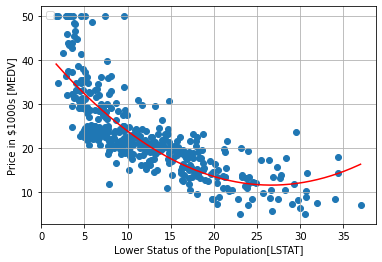

In [138]:
x = np.linspace(min(X[:,0]),max(X[:,0]),404)
y = reg.intercept_+reg.coef_[0][0]*x +reg.coef_[0][1]*x*x 
plt.plot(x, y, '-r')
plt.legend(loc='upper left')
plt.scatter(xtemp, ytemp)
plt.xlabel('Lower Status of the Population[LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.grid()
plt.show()

#### 10. Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model (which is a linear model including all features) compare tothe values you found for experiment (8) ( which was a degree-2 polynomial model including a single feature)? What accounts for the difference? 


In [139]:
X = x_train
t = y_train
t = np.reshape(t, (-1, 1))
print(X.shape)
print(t.shape)

(404, 13)
(404, 1)


In [140]:
reg = LinearRegression().fit(X, t)

In [141]:
reg.coef_

array([[-1.19721961e-01,  5.29635924e-02,  5.16150347e-02,
         2.55847703e+00, -1.72524020e+01,  4.08697043e+00,
        -4.64415129e-03, -1.52421308e+00,  2.99638323e-01,
        -1.37152390e-02, -8.48912621e-01,  6.56971068e-03,
        -5.33276034e-01]])

In [142]:
reg.intercept_

array([34.33727849])

In [143]:
y_pred = reg.predict(X)

In [144]:
print(" Avg training loss of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature Training loss'] = mean_squared_error(t, y_pred)

 Avg training loss of all 13 features:  21.046340805342375


In [145]:
X = x_test
t = y_test
t = np.reshape(t, (-1, 1))
print(X.shape)
print(t.shape)

(102, 13)
(102, 1)


In [146]:
y_pred = reg.predict(X)

In [147]:
print("Avg testing loss of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature Testing loss'] = mean_squared_error(t, y_pred)

Avg testing loss of all 13 features:  25.976408935996577


> The training set of data performing much better than testing data. And it is much than the previous model.

#### 11. Combine experiments (8) and (10), using np.hstack() to add the squares of all 13 input features to X. How do this model’s training and test MSE scores compare to the previous model using all 13 features?


In [148]:
X = x_train
t = y_train
t = np.reshape(t, (-1, 1))
XSq = np.square(X)
X = np.hstack((X,XSq))

In [149]:
reg = LinearRegression().fit(X, t)
y_pred = reg.predict(X)
print(" Avg Training loss for poly model of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature poly model Training loss'] = mean_squared_error(t, y_pred)

 Avg Training loss for poly model of all 13 features:  13.508100802461705


In [150]:
X = x_test
t = y_test
t = np.reshape(t, (-1, 1))
XSq = np.square(X)
X = np.hstack((X,XSq))

In [151]:
y_pred = reg.predict(X)
print("Avg Testing loss for poly model of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature poly model Testing loss'] = mean_squared_error(t, y_pred)

Avg Testing loss for poly model of all 13 features:  17.857896093007074


> here also the model is performing way better than the previous model.

In [152]:
for i in mse_dict:
    print ("{:45}{:15}".format(i,mse_dict[i]))

Single Feature Training loss                 38.47893344802523
Single Feature Testing loss                  38.75054664279497
Single Feature poly model Training loss      30.598514349370966
Single Feature poly model Testing loss       29.297124138279123
All Feature Training loss                    21.046340805342375
All Feature Testing loss                     25.976408935996577
All Feature poly model Training loss         13.508100802461705
All Feature poly model Testing loss          17.857896093007074


#### 12. Scikit-learn is also capable of constructing polynomial features for us using sklearn.preprocessing.PolynomialFeatures, but those features also include interaction features, where the feature terms are multiplied together. Use the fit_transform() method to create degree-2 polynomial and interaction terms for the original set of 13 features, then fit a new linear model. Compare the training and test MSE to the previous model. What is the effect of adding interaction terms in this case? Do we seem to be overfitting?


In [153]:
X = x_train
t = y_train
t = np.reshape(t, (-1, 1))
print(X.shape)
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
print(X.shape)

(404, 13)
(404, 105)


In [154]:
reg = LinearRegression().fit(X, t)
y_pred = reg.predict(X)
print("Avg Training loss for polyFeatures model of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature polyFeatures model Training loss'] = mean_squared_error(t, y_pred)

Avg Training loss for polyFeatures model of all 13 features:  10.830195267983326


In [155]:
X = x_test
t = y_test
t = np.reshape(t, (-1, 1))
print(X.shape)
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)
print(X.shape)

(102, 13)
(102, 105)


In [156]:

y_pred = reg.predict(X)
print("Avg Testing loss for polyFeatures model of all 13 features: ",mean_squared_error(t, y_pred))
mse_dict['All Feature polyFeatures model Testing loss'] = mean_squared_error(t, y_pred)

Avg Testing loss for polyFeatures model of all 13 features:  20.467478715479583


In [157]:
for i in mse_dict:
    print ("{:45}{:15}".format(i,mse_dict[i]))

Single Feature Training loss                 38.47893344802523
Single Feature Testing loss                  38.75054664279497
Single Feature poly model Training loss      30.598514349370966
Single Feature poly model Testing loss       29.297124138279123
All Feature Training loss                    21.046340805342375
All Feature Testing loss                     25.976408935996577
All Feature poly model Training loss         13.508100802461705
All Feature poly model Testing loss          17.857896093007074
All Feature polyFeatures model Training loss 10.830195267983326
All Feature polyFeatures model Testing loss  20.467478715479583


> The model appears to be overfitting. The model is performing worse on test data, I think the problem is in the interaction features.